# The Sparks Foundation (GRIP)

## Data Science and Business Analytics Intern

## Author : Shubham Mehar

## Task3:To Perform "Exploratory Data Analysis" on a dataset of "SampleSuperStore".
**As a business manager, try to find out the weak areas where you can work to make profit.**

**What all business problems you can derive by exploring the data?**

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Checking Data

In [2]:
storedata=pd.read_csv("SampleSuperstore.csv")

In [3]:
#Checking first 5 rows
storedata.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#checking dimensionality
storedata.shape

(9994, 13)

In [5]:
#checking duplicate 
storedata.duplicated().sum()

17

In [6]:
#Removing duplicates
storedata.drop_duplicates(inplace=True)

In [7]:
storedata.shape

(9977, 13)

In [8]:
#Checking Descriptive Statistics
storedata.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [9]:
#checking information
storedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [10]:
#Checking Null values in each column
storedata.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
#Checking columns
storedata.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
#Checking number of unique values in columns
storedata.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Exploratory Data Analysis

In [13]:
storedata.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


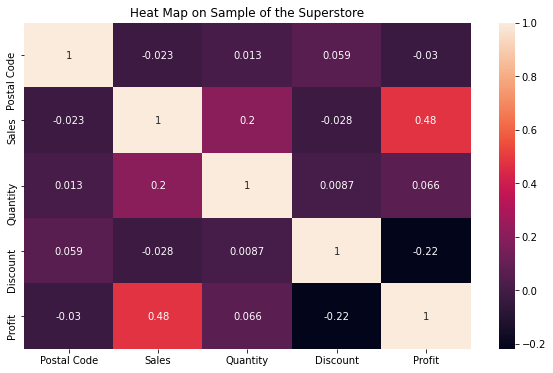

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(storedata.corr(),annot=True)
plt.title("Heat Map on Sample of the Superstore")
plt.show()

**Sales and profit are highly correlated.**

**Discount and profit are negatively correlated.**

**Discount and Quantity are least correlated.**

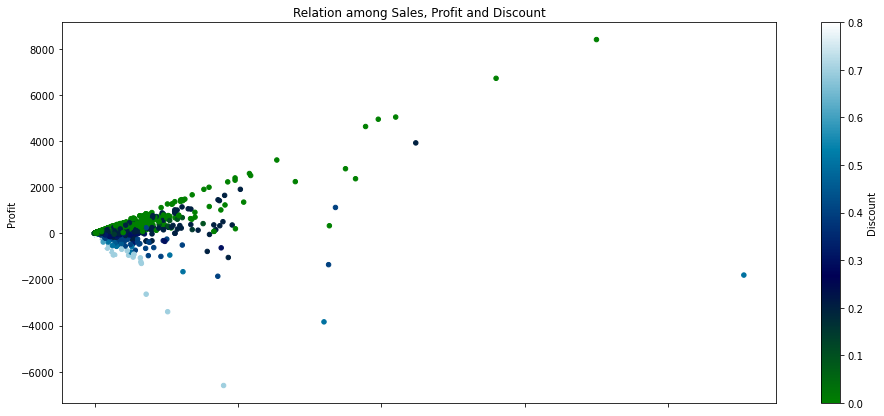

In [15]:
# Relation among Sales, Profit and Discount
storedata.plot(kind="scatter",x="Sales",y="Profit",c="Discount",colormap="ocean",figsize=(16,7))
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Relation among Sales, Profit and Discount")
plt.show()

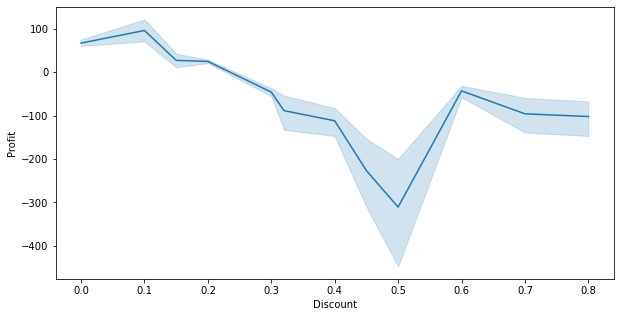

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Discount",y="Profit",data=storedata)
plt.show()

<AxesSubplot:xlabel='Category', ylabel='count'>

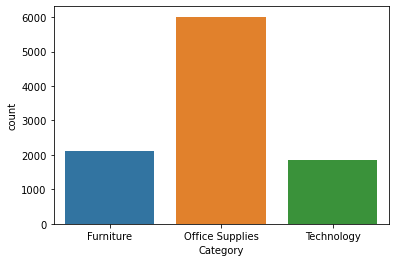

In [17]:
sns.countplot(x="Category",data=storedata)

**The Office supplies category is the most selling category.**

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64




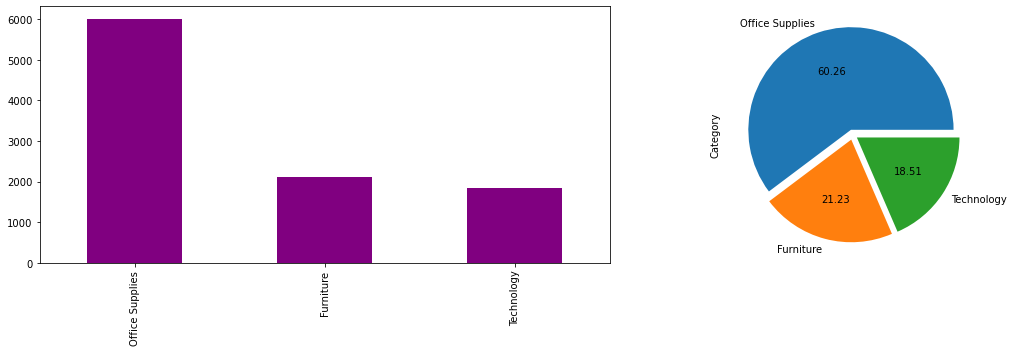

In [18]:
cat=storedata["Category"].value_counts()
print(cat)
print("\n")

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
(storedata["Category"].value_counts()).plot(kind="bar",color="purple")

plt.subplot(1,2,2)
storedata["Category"].value_counts().plot.pie(autopct="%.2f", explode=(0.05,0.05,0.05))
plt.tight_layout()

**The Office supplies category has a 60.26% share from the category.**

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

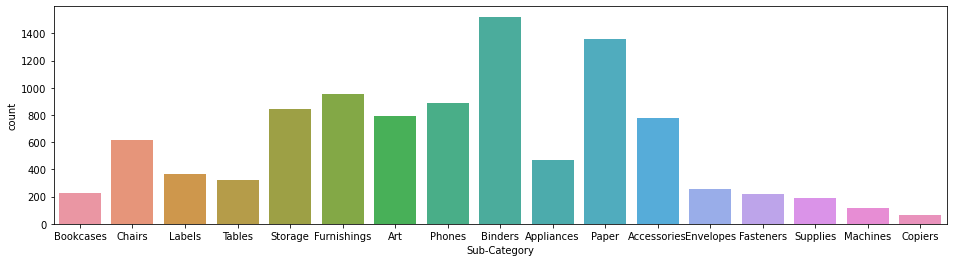

In [19]:
# plotting Sub category items.

plt.figure(figsize=(16,4))
sns.countplot(x="Sub-Category",data=storedata)

In [20]:
storedata["Sub-Category"].value_counts()/len(storedata["Sub-Category"])*100

#plt.figure(figsize=(10,10))
#storedata["Sub-Category"].value_counts().plot.pie(autopct="%.2f")

Binders        15.255087
Paper          13.621329
Furnishings     9.582039
Phones          8.910494
Storage         8.479503
Art             7.968327
Accessories     7.767866
Chairs          6.164178
Appliances      4.670743
Labels          3.638368
Tables          3.197354
Envelopes       2.545855
Bookcases       2.285256
Fasteners       2.175003
Supplies        1.904380
Machines        1.152651
Copiers         0.681568
Name: Sub-Category, dtype: float64

**Binders is the most selling item and Copier is least selling.**

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64




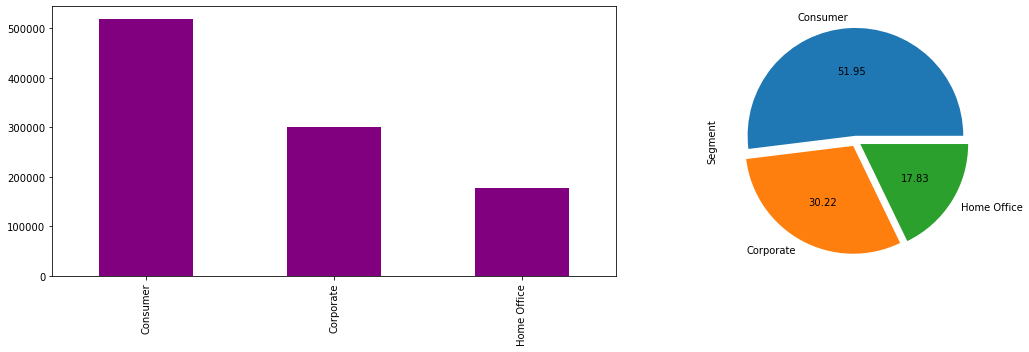

In [21]:
seg=storedata["Segment"].value_counts()
print(seg)
print("\n")

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
(storedata["Segment"].value_counts()*100).plot(kind="bar",color="purple")

plt.subplot(1,2,2)
storedata["Segment"].value_counts().plot.pie(autopct="%.2f", explode=(0.05,0.05,0.05))
plt.tight_layout()

**The consumer segment buys more from superstore compared to other segments.**

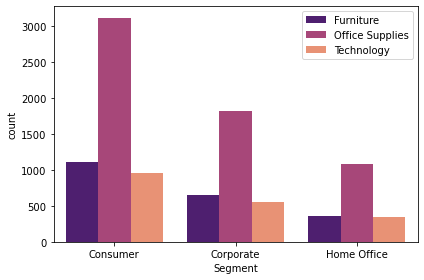

In [22]:
sns.countplot(x='Segment',data=storedata,hue="Category",palette='magma')
plt.legend(loc=0)
plt.tight_layout()

**Office supplies are the most selling category in all the segments.**

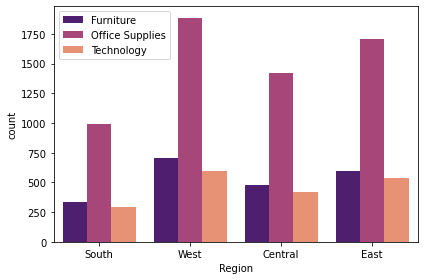

In [23]:
sns.countplot(x='Region',data=storedata,hue="Category",palette='magma')
plt.legend(loc=0)
plt.tight_layout()

**Office supplies are the most selling category in all the regions.**

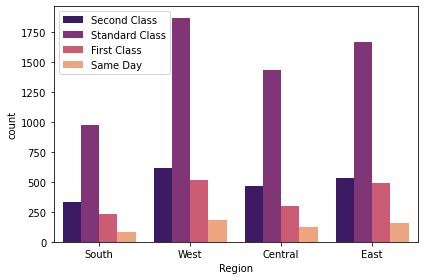

In [24]:
sns.countplot(x='Region',data=storedata,hue="Ship Mode",palette='magma')
plt.legend(loc=0)
plt.tight_layout()

**Standard class is the most preffered shipping mode in all the regions.**

## Most selling top 10 products(Sub-Category)

<AxesSubplot:xlabel='Sub-Category'>

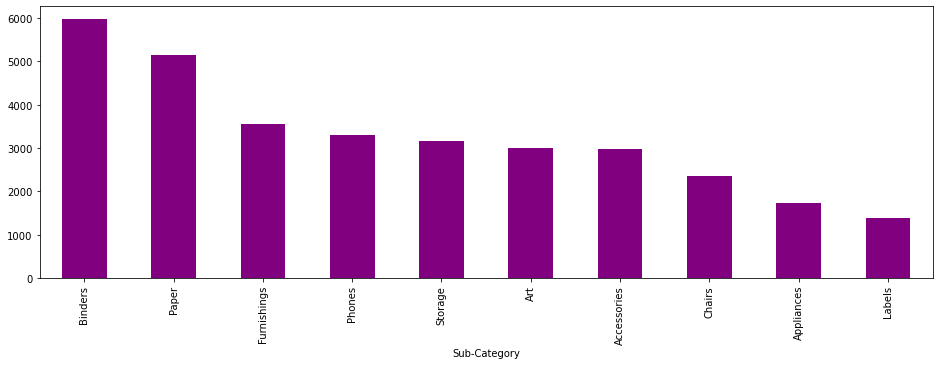

In [25]:
#Grouping Sub Category based on Quantity
mostSell=(storedata.groupby("Sub-Category").sum()["Quantity"])

#sorting 
mostSelltop10=mostSell.sort_values( ascending=False)

#Plotting top 10 selling products
plt.figure(figsize=(16,5))
mostSelltop10.head(10).plot(kind="bar", color="purple")

## Top 10 products by Profit

<AxesSubplot:xlabel='Sub-Category'>

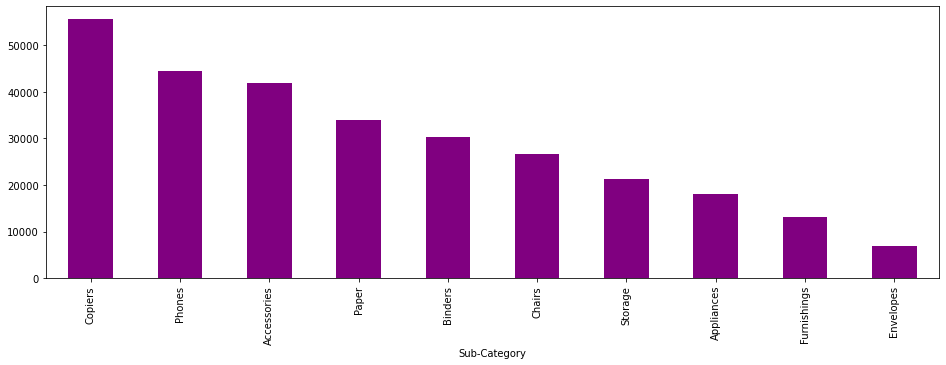

In [26]:
profitProduct=(storedata.groupby("Sub-Category").sum()["Profit"])

#sorting 
top10profitProduct=profitProduct.sort_values( ascending=False)

#Plotting top 10 selling products
plt.figure(figsize=(16,5))
top10profitProduct.head(10).plot(kind="bar", color="purple")

**Copiers are most profitable item in the store.**

## Loss making products

<AxesSubplot:xlabel='Sub-Category'>

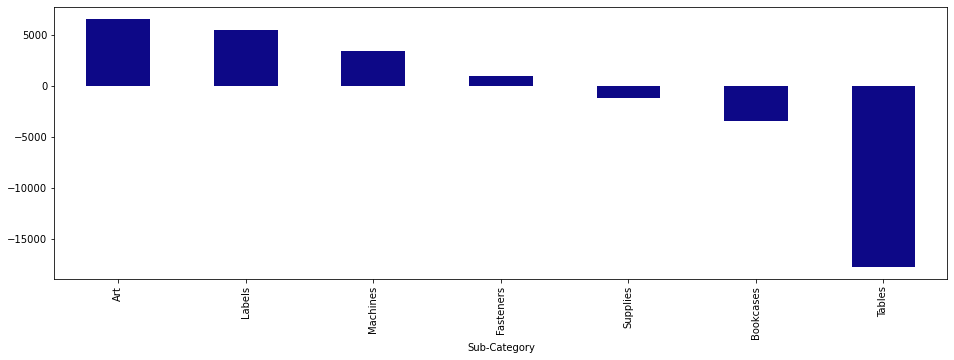

In [27]:
#Plotting loss making products
plt.figure(figsize=(16,5))
top10profitProduct.tail(7).plot(kind="bar", cmap="plasma")

**Tables are loss making item in the store.**

## Which are the most profitable Category and sub-category

<AxesSubplot:xlabel='Category,Sub-Category'>

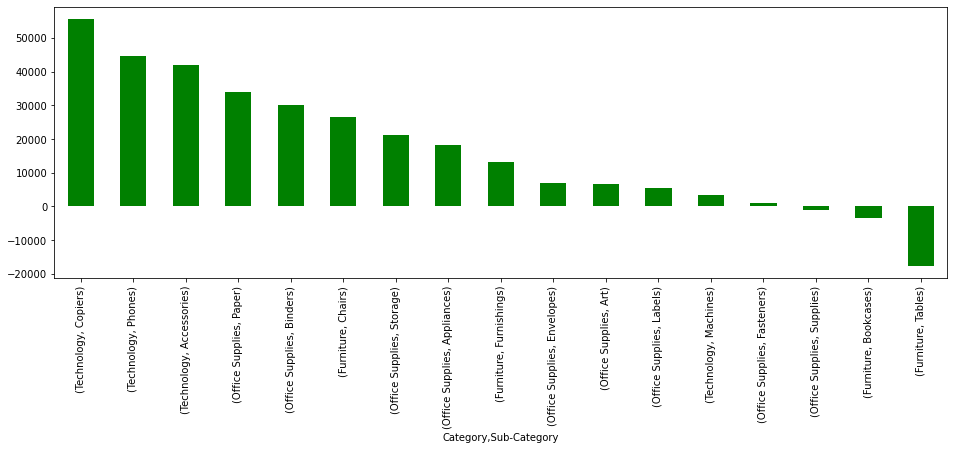

In [28]:
profiCatSubcat=(storedata.groupby(["Category", "Sub-Category"]).sum()["Profit"])

#sorting 
mostprofiCatSubcat=profiCatSubcat.sort_values( ascending=False)

#Plotting
plt.figure(figsize=(16,5))
mostprofiCatSubcat.plot(kind="bar",cmap="ocean")


## Which are the most Saled Category and sub-category¶

<AxesSubplot:xlabel='Category,Sub-Category'>

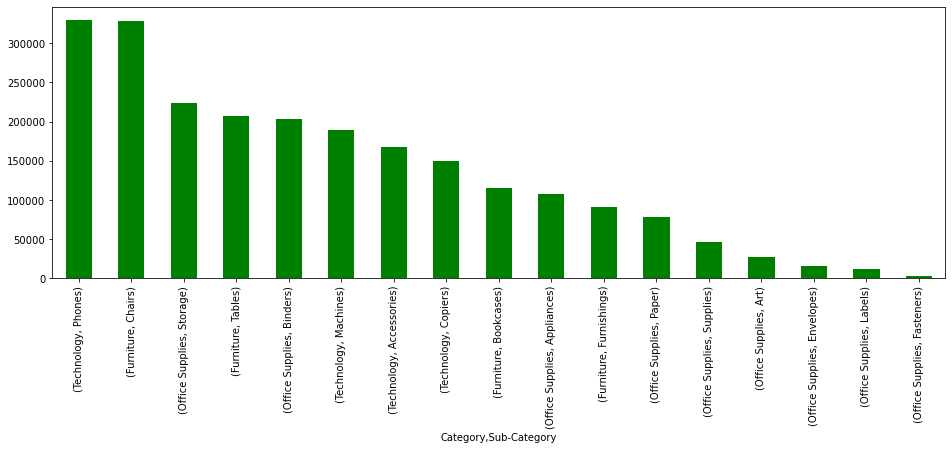

In [29]:
saleCatSubcat=(storedata.groupby(["Category", "Sub-Category"]).sum()["Sales"])

#sorting 
mostsaleCatSubcat=saleCatSubcat.sort_values( ascending=False)

#Plotting
plt.figure(figsize=(16,5))
mostsaleCatSubcat.plot(kind="bar",cmap="ocean")


## Profit and Sales in Ship Mode

<AxesSubplot:xlabel='Ship Mode'>

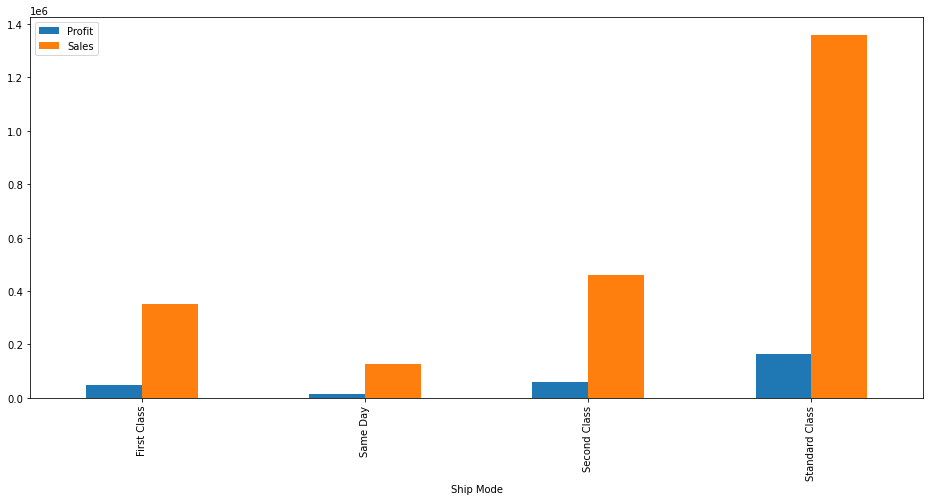

In [30]:
shipingProfit=storedata.groupby("Ship Mode").sum()[["Profit","Sales"]]

shipingProfit.plot(kind="bar",figsize=(16,7))

**Maximum sales and profit is at standard class shipping mode.**

## Region wise profit distribution

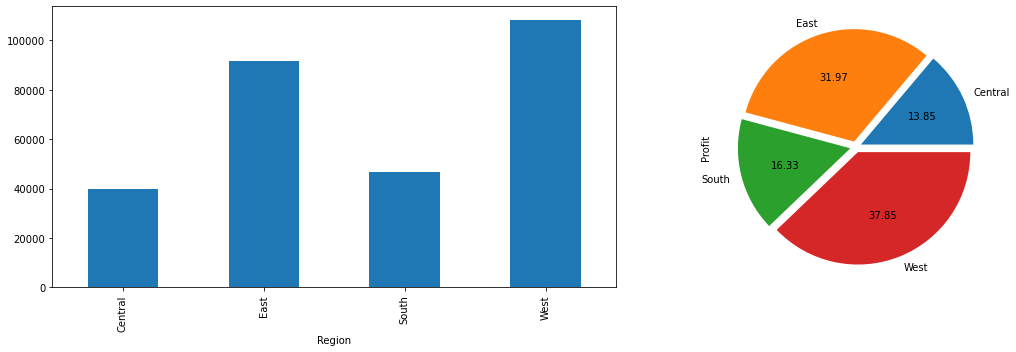

In [31]:
regionProfit=storedata.groupby("Region").sum()["Profit"]

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
regionProfit.plot(kind="bar")

plt.subplot(1,2,2)
regionProfit.plot.pie(autopct="%.2f", explode=(0.05,0.05,0.05,0.05))

plt.tight_layout()

**West region is giving more profit to the superstore than the other regions.**

## Segment wise profit distribution¶

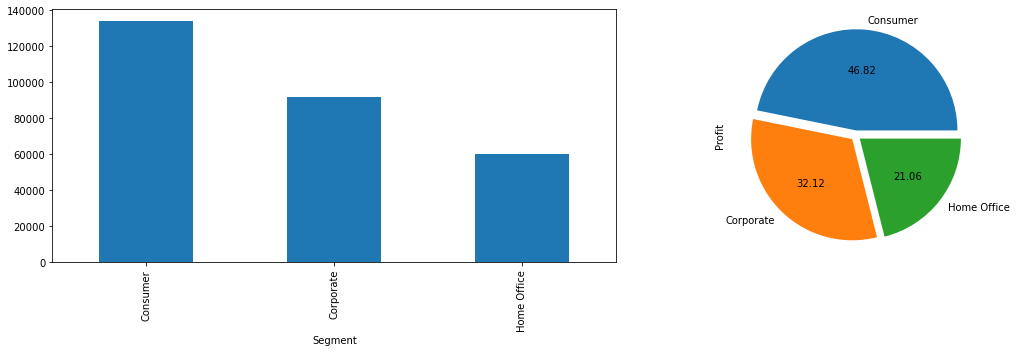

In [32]:
segmentProfit=(storedata.groupby("Segment").sum()["Profit"])

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
segmentProfit.plot(kind="bar")

plt.subplot(1,2,2)
segmentProfit.plot.pie(autopct="%.2f", explode=(0.05,0.05,0.05))

plt.tight_layout()

**From above plots we can say that Consumer segment gives more profit.**

# Category wise profit distribution

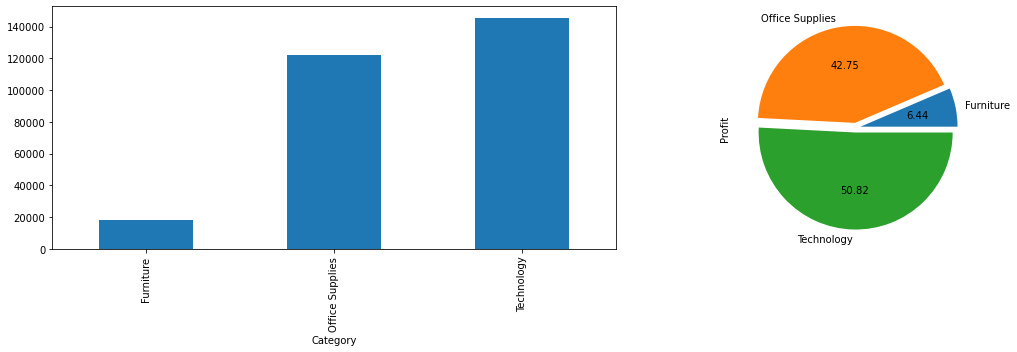

In [33]:
categoryProfit=(storedata.groupby("Category").sum()["Profit"])

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
categoryProfit.plot(kind="bar")

plt.subplot(1,2,2)
categoryProfit.plot.pie(autopct="%.2f", explode=(0.05,0.05,0.05))

plt.tight_layout()

**Furniture is less profit contributing category in the superstore.**

## Checking profit in All States

<AxesSubplot:xlabel='State'>

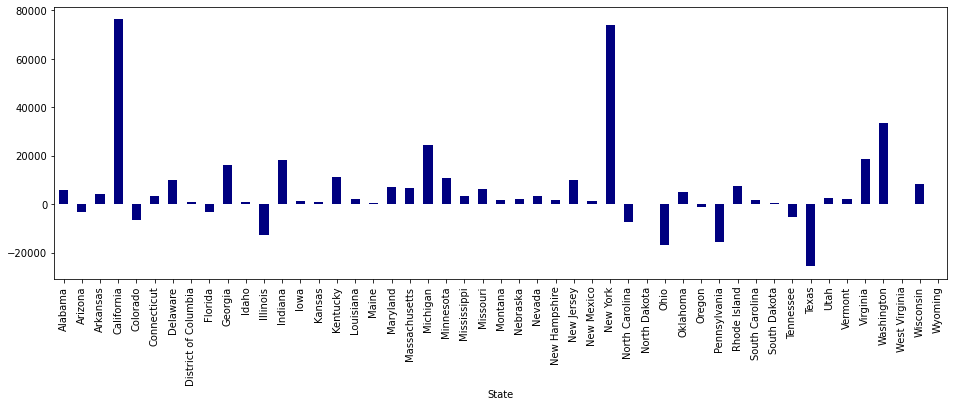

In [34]:
statesProfit=storedata.groupby("State").sum()["Profit"]

#Plotting
plt.figure(figsize=(16,5))
statesProfit.plot(kind="bar",cmap="jet")

In [35]:
#statesProfit=pd.DataFrame(storedata.groupby("State").sum()["Profit"])
#statesProfit

## Checking Sales in All States

<AxesSubplot:xlabel='State'>

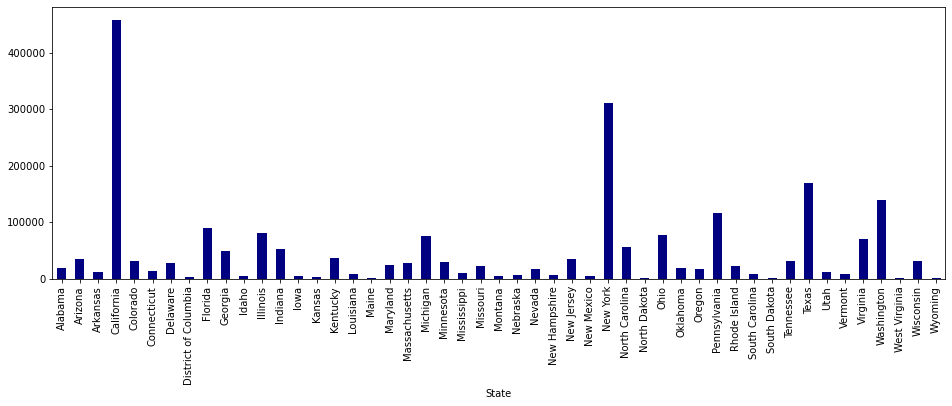

In [36]:
statesProfit=storedata.groupby("State").sum()["Sales"]

#Plotting
plt.figure(figsize=(16,5))
statesProfit.plot(kind="bar",cmap="jet")

In [37]:
#statesProfit=pd.DataFrame(storedata.groupby("State").sum()["Sales"])
#statesProfit

**There are very few states where the sales of the superstore are high they have to focus on other states.**

## Checking the role of discount on profit.

<AxesSubplot:xlabel='Discount'>

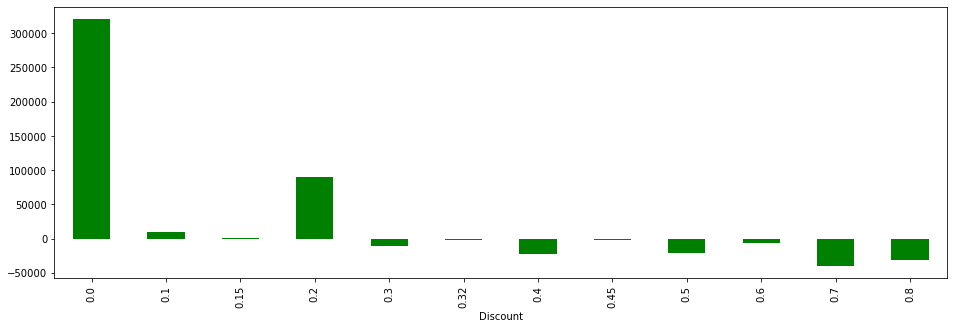

In [38]:
discountProfit=storedata.groupby("Discount").sum()["Profit"]

#Plotting
plt.figure(figsize=(16,5))
discountProfit.plot(kind="bar",color="green")

In [39]:
#discountProfit=pd.DataFrame(storedata.groupby("Discount").sum()["Profit"])
#discountProfit

**When superstore offers discount more than 20% to the consumers, the superstore starts making losses.**

## Checking the role of discount on sales.

<AxesSubplot:xlabel='Discount'>

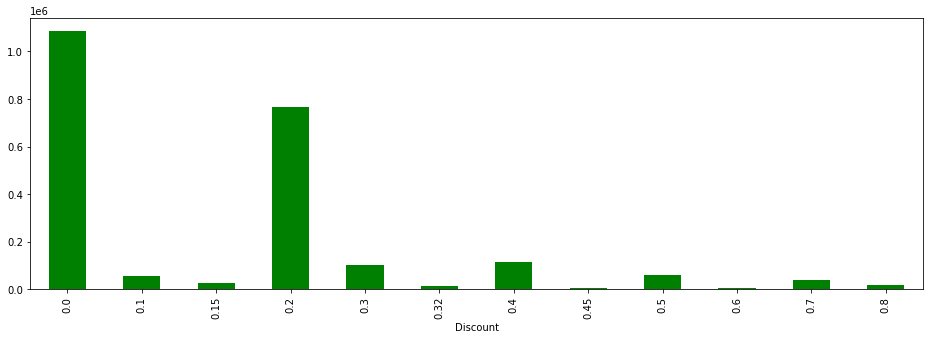

In [40]:
salesProfit=storedata.groupby("Discount").sum()["Sales"]

#Plotting
plt.figure(figsize=(16,5))
salesProfit.plot(kind="bar",color="green")

**When customer get a 20% discount on the items the sales is increased than the other discount offers and superstore make profit also.**

## Observations

Sales and profit are highly correlated.

Discount and profit are negatively correlated.

Discount and Quantity are least correlated.

The Office supplies category is the most selling category.

The Office supplies category has a 60.26% share from the category.

Binders is the most selling item and Copier is least selling.

The consumer segment buys more from superstore compared to other segments.

Office supplies are the most selling category in all the segments.

Office supplies are the most selling category in all the regions.

Standard class is the most preferred shipping mode in all the regions.

Copiers are most profitable item in the store.

Tables are loss making item in the store.

Maximum sales and profit are at standard class shipping mode.

West region is giving more profit to the superstore than the other regions.

Consumer segment gives more profit.

Furniture is less profit contributing category in the superstore.

There are very few states where the sales of the superstore are high, they have to focus on other states.

When superstore offers discount more than 20% to the consumers, the superstore starts making losses.

When customer get a 20% discount on the items the sales is increased than the other discount offers and superstore make profit also.

## Conclusion

Store manager should focus on increasing sales of technology items.

Store should focus more on home office and corporate segments.

Copier is one of the least selling items but it gives more profit, so at the low sales states these types of items can play vital role in profit making.

Technology items are more profitable even though its sales may be low.

Consumer segment should encourage more it buys more from the store.

Store should avoid giving discount more than 20%.

Superstore should focus on the states where they are making losses and they have to focus on the item which gives profit more and parallelly sales other items too.

Managers should focus on south and central region to grow their business and try to increase more sales and profit.
